# A. Problem Definition

Portuegese Bank notied that during May 2008 to November 2010, only few of Bank client agreed to open term deposit. This impacted on how the bank run the business such as : to put the money in more higher rate of return in financial product or to lend the money out to its other clients, thereby receiving a higher interest rate from the borrowers. The bank will not able to continue its bussiness if they have low in assets (in this case is money deposit from the client)

Our team works as Data Scientist in the Portuguese Bank to help business getting more valuable customer who will agree on the future campaign offer, thus increase marketing effieciency. In addition, we will try to define the probability group (in percentage) of customer who will agree to place term deposit. 

# B. Business Questions

## Business Questions for Machine Learning

1. How to predict a successful marketing campaign via Telemarketing in order to increase valuable customer who will open term deposit ?

## Business Questions for Data Analysis
1. Which customer age group is the most targeted on previous campaign  ?
2. Does marital status impact on decision opening term deposit ?
3. Which job type tend to open the term deposit ?
4. How customer last education impact on opening term deposit ?
5. How the rest categorical feature impact on customer decision  ?
6. How socio economic attribute impact on customer decision ?
7. Based on previous campaign, when is the best time customer tend to say "yes" ?


# C. About Dataset

This dataset is describing Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'. It includes following fields:

| Field          | Description                                                                           | Data Type |
| -------------- | ------------------------------------------------------------------------------------- | ---------|
| **Bank Client Data**                                                                                   
| age            | Whether a loan is paid off on in collection| Int |
| job            | Type of Job                                                   | Categorical |
| marital        | Marital Status| Categorical |
| education      | Education Background                                       | Categorical |
| default        | Does customer have credit in default               | Categorical |
| housing        | Does customer have housing loan                                                                     | Categorical |
| loan           | Does customer have personal loan
| **Last Contact Details related to Campaign**                                                           | Categorical |
| contact        | Communication type                                                              | Categorical |
| month          | Last contact month                                                              | Categorical |
| day_of_week         | Last contact days of week                                                             | Categorical |
| duration       |   Last contact duration                                                             | Int |
| **Attributes**                                                           |
| campaign        |  number of contacts performed during this campaign and for this client                                                               | Int |
| pdays        | number of days that passed by after the client was last contacted from a previous campaign                                                              | Int |
| previous          | number of contacts performed before this campaign and for this client (numeric)                                                             | Int |
| poutcome          | outcome of the previous marketing campaign                                                                | Categorical |
| **Socio Economic Attr**                                                           |
| emp.var.rate       | employment variation rate : Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy| Int|
| cons.price.idx | consumer price index  :  measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services | Int|
| cons.conf.idx | consumer confidence index :  that measures how optimistic or pessimistic consumers are regarding their expected financial situation | Int|
| euribor3m | euribor 3 month rate - daily indicator :  serangkaian suku bunga referensi yang diterbitkan setiap hari oleh European Money Markets Institute | Int|
| nr.employed | number of employees - quarterly indicator| Int|
| y | Target Prediction | 

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# D. Data Understanding

In [1]:
# Nanti semua import di masukin di awal aja

In [2]:
# For Dataset handling
import numpy as np
import pandas as pd

# For Checking Distribution Data
from scipy.stats import chisquare, kstest, normaltest

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('bank-additional-full.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## D.1. Checking Data Proportion

In [7]:
((df['y'].value_counts()/len(df))*100).round(2)

no     88.73
yes    11.27
Name: y, dtype: float64

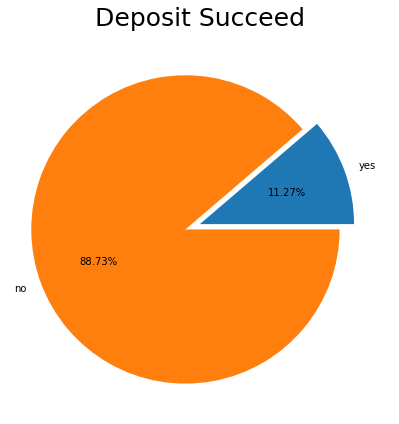

In [8]:
sizes = list(df['y'].value_counts().sort_values().values)
labels = list(df['y'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Deposit Succeed', fontsize=25)
plt.tight_layout()
plt.show()

We can see the data is imbalanced with proportion 88.73 % and 11.27 % for No and Yes anwers

## D.2 Checking Distribution Data

In [9]:
cek = ["age", "duration", "campaign","pdays","previous","emp.var.rate","cons.conf.idx"]

In [10]:
alpha = 0.05

In [11]:
for i in cek:
    print ([i])
    a, b = normaltest(df[i])
    print("statistic", a, "pvalue", b)
    if b < alpha :
        print("Distribution not normal")
    else :
        print("Distribution normal")



['age']
statistic 3904.8876514999647 pvalue 0.0
Distribution not normal
['duration']
statistic 30134.609343764896 pvalue 0.0
Distribution not normal
['campaign']
statistic 40280.13051119697 pvalue 0.0
Distribution not normal
['pdays']
statistic 38981.24259450561 pvalue 0.0
Distribution not normal
['previous']
statistic 33221.4758498975 pvalue 0.0
Distribution not normal
['emp.var.rate']
statistic 16401.626424804053 pvalue 0.0
Distribution not normal
['cons.conf.idx']
statistic 936.3737615560685 pvalue 4.6668213776494045e-204
Distribution not normal


## D.3 Checking Data Info and Statistical Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Statistical Data for Numerical Features**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**Statistical Data for Categorical Features**

In [14]:
df.describe(include = 'object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [15]:
dataDesc= []

for i in df.columns:
    dataDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100),2),
        df[i].nunique(),
        df[i].sample(20).drop_duplicates().values
    ])
pd.DataFrame(dataDesc, columns=[
    "Data features", 
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data features,Data types,Null,Null Percentage,Unique,Unique Sample
0,age,int64,0,0.0,78,"[40, 46, 36, 73, 39, 49, 35, 28, 33, 21, 55, 2..."
1,job,object,0,0.0,12,"[housemaid, services, technician, self-employe..."
2,marital,object,0,0.0,4,"[married, single, divorced]"
3,education,object,0,0.0,8,"[university.degree, basic.6y, high.school, bas..."
4,default,object,0,0.0,3,"[unknown, no]"
5,housing,object,0,0.0,3,"[yes, no, unknown]"
6,loan,object,0,0.0,3,"[no, yes]"
7,contact,object,0,0.0,2,"[cellular, telephone]"
8,month,object,0,0.0,10,"[may, nov, aug, apr, jun, jul, mar]"
9,day_of_week,object,0,0.0,5,"[thu, mon, tue, fri, wed]"


- From numerical descriptive result : 
    - "campaign", "age" and "cons.conf.idx" features having big differences between Q3 (75%) and max value. We need to check further this outliers in the boxplot and scatterplot
    - duration will be dropped as it has higher correlation with the result of the campaign as we will not know how long the duration will be before the telemarketing team performed the call.
- From categorical descriptive result :
    - there is unknown data for features : job ,marital ,education ,default, housing, loan. We will treat this unkown as missing value and we will fill in with modus value (higher frequency of each feature)
    - day_of_week features shows that previous calls are held during weekdays
    - month features hows that previous calls are not hold in January and February 

# E. Data Cleaning

## E.1 check duplicate values

In [16]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [17]:
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## E.2 Handling Missing Value

In [18]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    df[column] = df[column].replace('unknown', np.NaN)

In [19]:
df.isna().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [20]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [21]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# E. Data Correlation and Outliers

we need to check the correlation of each features towards label 'y'. Besides, doing correlation checking for Feature Selection and EDA, this also would help to decide how to handle it if there is outliers

the correlation ratio is a measure of the curvilinear relationship between the statistical dispersion within individual categories

## E.3 Handling Outliers

### Finding outliers

- From result in statistical data (point D.3), we checked outliers for Age, Campaign and cons.conf.idx features
- From correlation ratio, we got correlation value for Age and Campaign as much as 0.03 and 0.07 accordingly.

### 1. Age

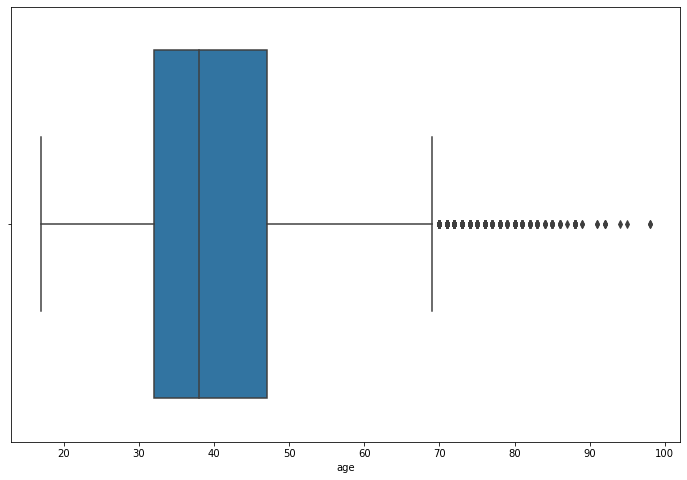

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age", hue='y')

plt.show()

After knowing the outliers of age features, we need to know how diverse age outliers towards "job" features because "job" features has the highest crammers v correlation score and it might be impacted if we remove the outliers

<AxesSubplot:xlabel='age', ylabel='job'>

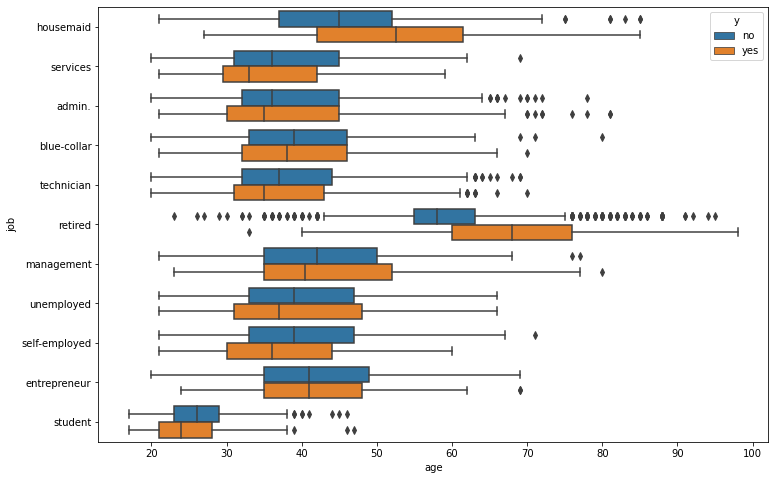

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age", y="job", hue='y')

We could see that job crammer's v correlation is decrease if we remove age outliers. Thus, we're NOT removing outliers in "age" features

### 2. Campaign

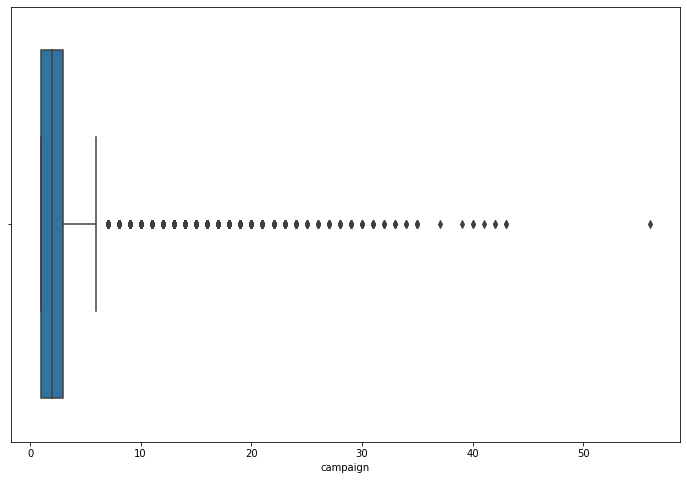

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="campaign", hue='y')

plt.show()

### 3. cons.conf.idx

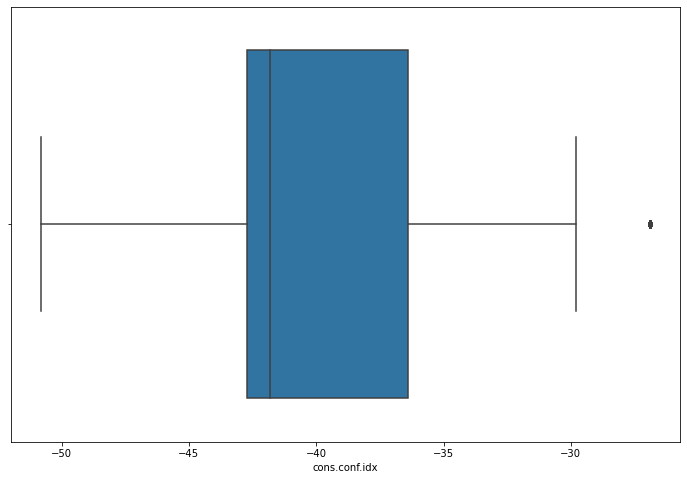

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="cons.conf.idx", hue='y')

plt.show()

<AxesSubplot:xlabel='cons.conf.idx', ylabel='job'>

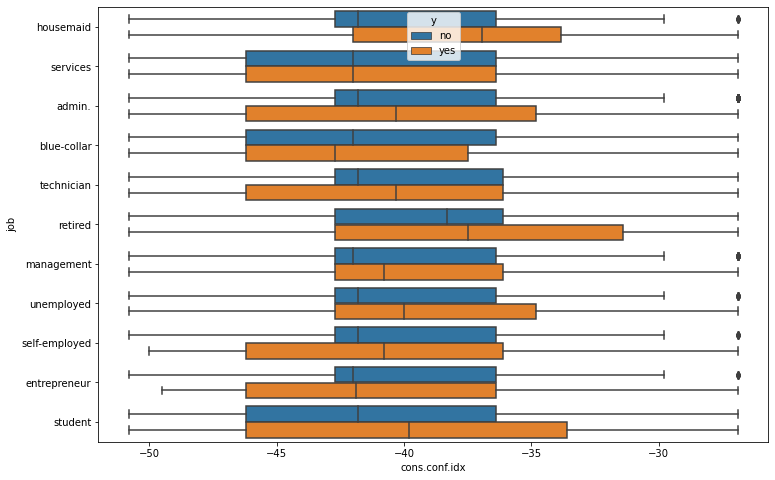

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="cons.conf.idx", y="job", hue='y')

We could see that job crammer's v correlation is decrease if we remove cons.conf.idx outliers. Thus, we're NOT removing outliers in "cons.conf.idx" features

# F. Exploratory Data Analysis

In [27]:
## checking data pattern of each column 

In [28]:
df['y'] = df['y'].apply(lambda y: 1 if y == 'yes' else 0)

## Which customer age group is the most targeted on previous campaign  ?

We categorize age into 3 groups :
16 - 31 = Young Adult
32 - 46 = Productive Adult
47 - 100 = Elderly

In [29]:
bin_age = [16, 32, 47, 100]
label_age = ['Young Adult', 'Productive Adult', 'Elderly']

In [30]:
df['age_group'] = pd.cut(df['age'], bins=bin_age, labels=label_age)

In [31]:
df['age_group'].value_counts()

Productive Adult    20132
Young Adult         11173
Elderly              9871
Name: age_group, dtype: int64

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly


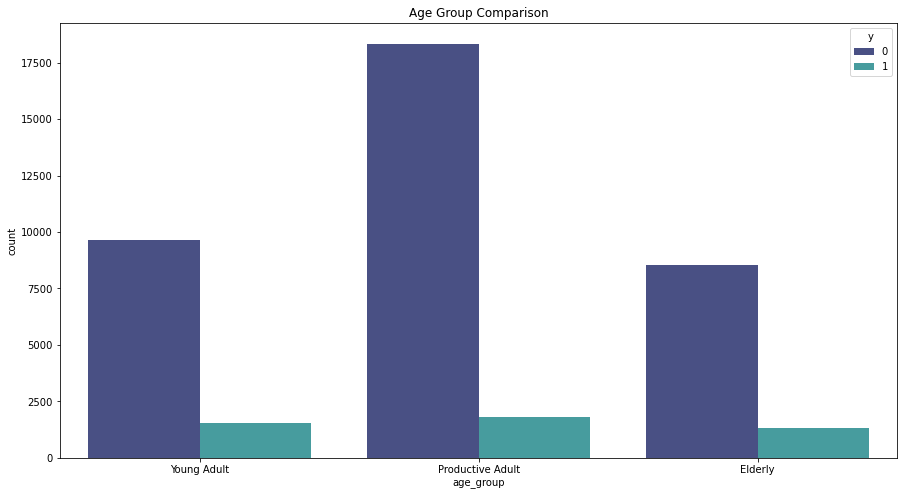

In [33]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["age_group"],hue=df["y"], data=df, palette='mako')
plt.title('Age Group Comparison')
plt.show()

In [34]:
age = ((pd.crosstab(index= df["age_group"], columns= df["y"], normalize="index"))*100).round(2)
age
age.sort_values(1,ascending=False)

y,0,1
age_group,,
Young Adult,86.32,13.68
Elderly,86.62,13.38
Productive Adult,91.11,8.89


Age_group Adult have the highest percentage of customer (87.41%) agree to open the term deposit.

## Does marital status impact on decision opening term deposit ?

In [35]:
df['marital'].value_counts()

married     25001
single      11564
divorced     4611
Name: marital, dtype: int64

In [36]:
df['Marital_Status'] =  df['marital'].map({'married' : 'married','single': 'not married','divorced':'not married'})

In [37]:
df['Marital_Status'].value_counts()

married        25001
not married    16175
Name: Marital_Status, dtype: int64

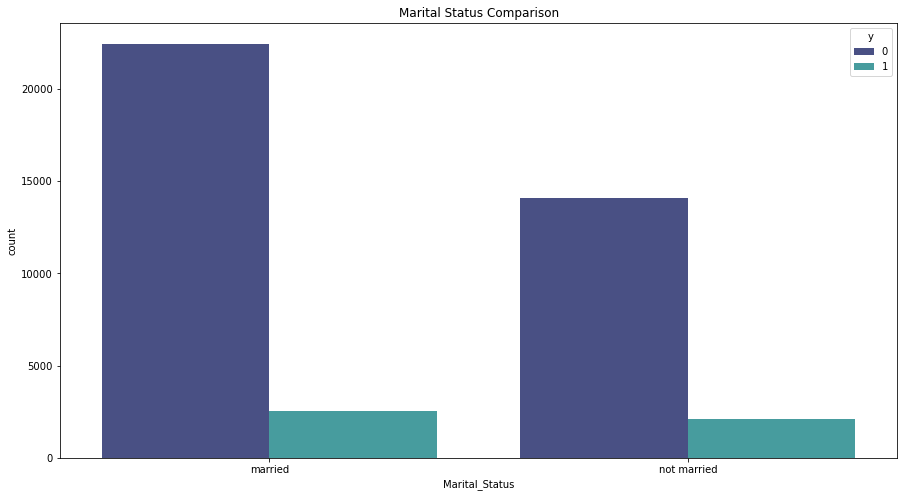

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Marital_Status"],hue=df["y"], data=df, palette='mako')
plt.title('Marital Status Comparison')
plt.show()

In [39]:
Marital = ((pd.crosstab(index= df["Marital_Status"], columns= df["y"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

y,0,1
Marital_Status,,
not married,87.04,12.96
married,89.83,10.17


Married people tend to opening the deposit with the percentage of 54.83%

## Which job type tend to open the term deposit ?

In [40]:
df['job'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [41]:
job_map = { 'entrepreneur' : 'self-employed'
    
}

df['Job_Type'] = df['job'].replace(job_map)
df['Job_Type'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
self-employed     2877
retired           1718
housemaid         1060
unemployed        1014
student            875
Name: Job_Type, dtype: int64

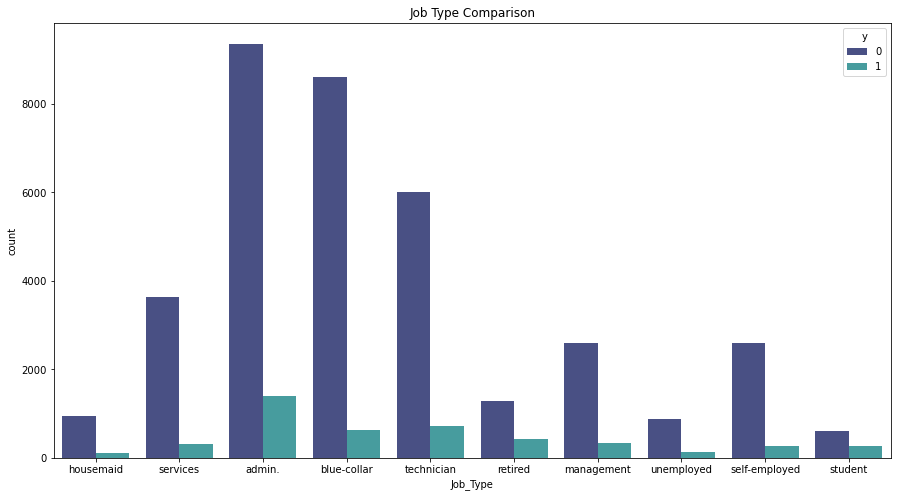

In [42]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Job_Type"],hue=df["y"], data=df, palette='mako')
plt.title('Job Type Comparison')
plt.show()

In [43]:
job = (pd.crosstab(index=df["Job_Type"], columns= df["y"], normalize= "index") *100).round(2)
job.sort_values(1, ascending=False)

y,0,1
Job_Type,,
student,68.57,31.43
retired,74.74,25.26
unemployed,85.80,14.20
admin.,87.09,12.91
management,88.78,11.22
technician,89.17,10.83
housemaid,90.00,10.00
self-employed,90.51,9.49
services,91.86,8.14


We can conclude that Job type Student, Retired and Unemployed customer are top 3 job type of customer who agree to open deposit term

## How customer last education impact on opening term deposit ?

In [44]:
df['education'].value_counts()

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [45]:
edu_map = { 'high.school' : 'school', 'basic.9y' : 'school', 'basic.4y' : 'school', 'basic.6y' : 'school'
    
}

df['Edu_Cat'] = df['education'].replace(edu_map)
df['Edu_Cat'].value_counts()

school                 22024
university.degree      13894
professional.course     5240
illiterate                18
Name: Edu_Cat, dtype: int64

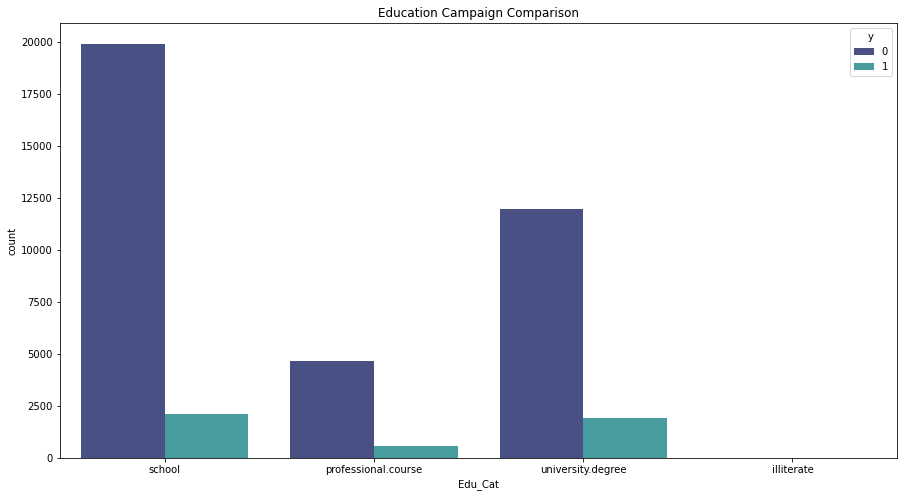

In [46]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Edu_Cat"],hue=df["y"], data=df, palette='mako')
plt.title('Education Campaign Comparison')
plt.show()

In [47]:
edu = (pd.crosstab(index=df["Edu_Cat"], columns= df["y"], normalize= "index") *100).round(2)
edu.sort_values(1, ascending=False)

y,0,1
Edu_Cat,,
illiterate,77.78,22.22
university.degree,86.18,13.82
professional.course,88.65,11.35
school,90.37,9.63


Customer with education background Illiterate tend to agree to open term deposit, it reach 22,22%. Following by education background as University Degree which is 13.82%

# How the rest categorical feature impact on customer decision ?

In [48]:
def pcat(x):
    if x == 999:
        return 'Never'
    else:
        return 'Yes'

In [49]:
df['pdays'] = df['pdays'].apply(pcat)

In [50]:
cat =['default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'pdays']
cat

['default', 'housing', 'loan', 'contact', 'poutcome', 'pdays']

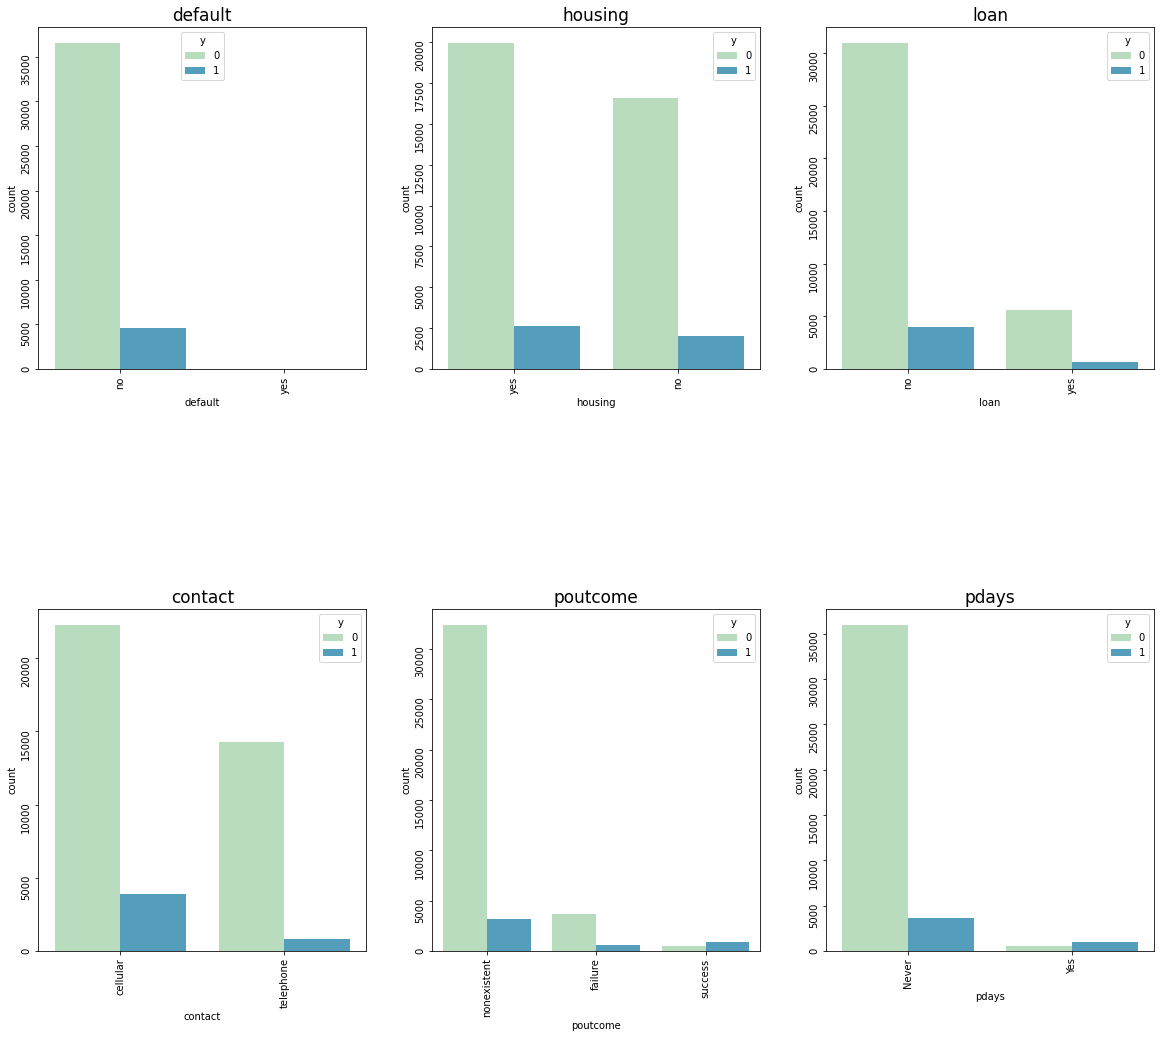

In [51]:
fig, ax = plt.subplots(2,3, figsize=(20,17))

cat 

ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

- Deafult, housing, loan and contact features follow the same trend, there is a group that is mostly targeted and then it descends. The proportion of 'yes' and 'no', is in line with the descends of the targeted number
- poutcome and pdays features are the past campaign result features. We conclude that customer which never called before is likely to have bigger proportions than customer which had called before

# How socio economic attribute impact on customer decision ?

In [52]:
socio_economic = df.select_dtypes(['int64', 'float64'])
socio_economic = socio_economic.drop(columns=['age','duration','campaign','previous','y'])
socio_economic.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


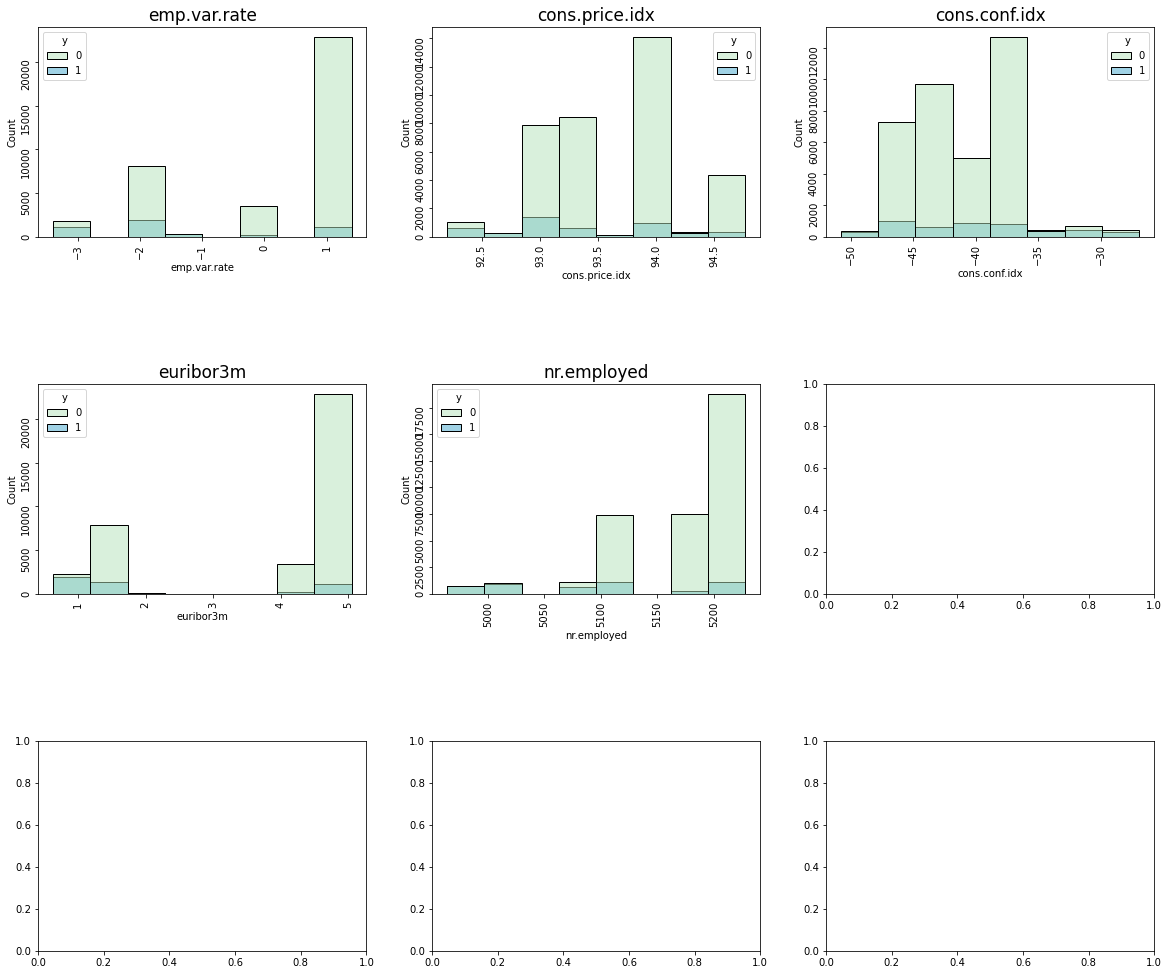

In [53]:
fig, ax = plt.subplots(3,3, figsize=(20,17))

socio_economic

ax = ax.ravel()
position = 0
for i in socio_economic:
    
    #order = df[i].value_counts().index
    sns.histplot(data=socio_economic, x=socio_economic[i], ax=ax[position], hue=df['y'], palette='GnBu', bins=8)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

# Based on previous campaign, when is the best time customer tend to say "yes" ?

In [54]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

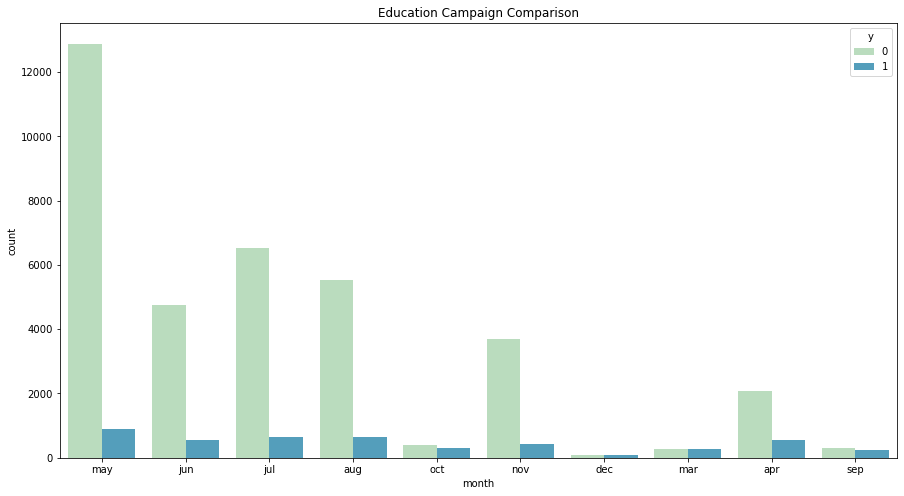

In [55]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['month'], hue='y', palette='GnBu')
plt.title('Education Campaign Comparison')
plt.show()


In [56]:
month = (pd.crosstab(index=df["month"], columns= df["y"], normalize= "index") *100).round(2)
month.sort_values(1, ascending=False)

y,0,1
month,,
mar,49.45,50.55
dec,51.10,48.90
sep,55.09,44.91
oct,56.07,43.93
apr,79.51,20.49
aug,89.39,10.61
jun,89.49,10.51
nov,89.85,10.15
jul,90.96,9.04


The highest percentage (50.55%) customer tend to say yes is on March, followed by December and September in the second and third place

In [57]:
comb = (pd.crosstab(index=[df["month"],df["day_of_week"]], columns= df["y"], normalize= "index")*100).round(2)
comb.sort_values(1, ascending=False).head(5)

y                      0      1
month day_of_week              
dec   tue          40.00  60.00
mar   wed          40.00  60.00
      tue          40.00  60.00
dec   wed          40.00  60.00
mar   fri          47.87  52.13

- We can see that December on Tuesday and Wednesday are the day when past campaign was getting the highest proportion of "yes" answer
- Following by March on Tuesday and Wednesday as well

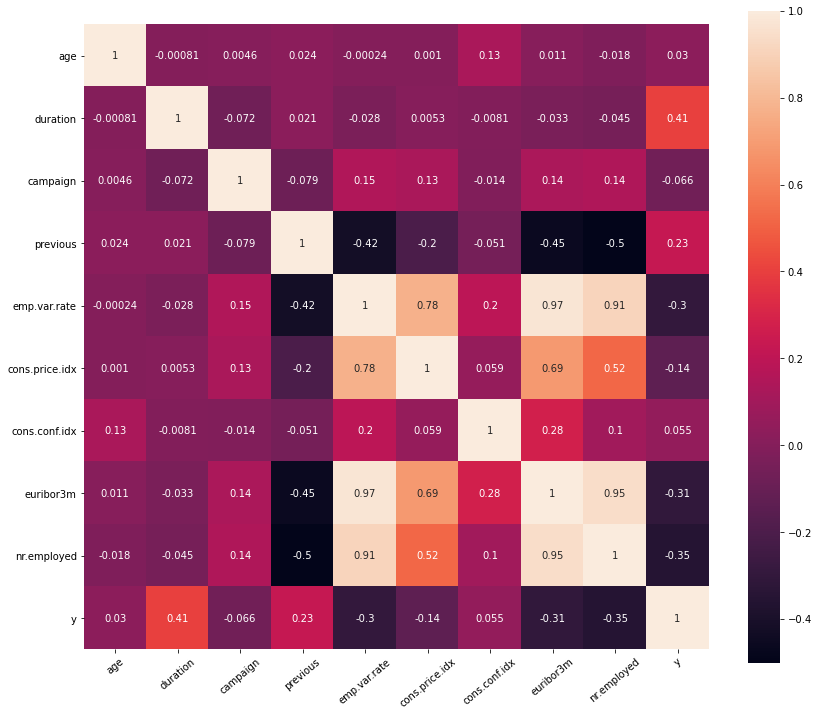

In [58]:
cm = df[df.select_dtypes(['int64', 'float64']).columns].corr()

f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2g', 
            annot_kws={'size': 10},
           )
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)

plt.show()

## EDA Conclusion

1. Age_group Adult have the highest percentage of customer (87.41%) agree to open the term deposit. Following by young adult and elderly
2. Married customer tend to opening the deposit with the percentage of 54.83%, and Not Married customer falls for 45.15 % on agree for opening the deposit
3. We can conclude that Job type Student, Retired and Unemployed customer are top 3 job type of customer who agree to open deposit term
4. Customer with education background Illiterate tend to agree to open term deposit, it reach 22,22%. Following by education background as University Degree which is 13.82%
5. - Deafult, housing, loan and contact features follow the same trend, there is a group that is mostly targeted and then it descends. The proportion of 'yes' and 'no', is in line with the descends of the targeted number
   - poutcome and pdays features are the past campaign result features. We conclude that customer which never called before is likely to have bigger proportions than customer which had called before
6. - emp.var.rate : The proportion customer agree to open deposit is when emp.var.rate between -2 and -3
   - cons.price.idx : The proportion customer agree to open deposit is when euribor3m close to 93
   - cons.conf.idx : The proportion customer agree to open deposit varying across cons.conf.idx value
   - euribor3m : The proportion customer agree to open deposit is when euribor3m close to 1
7. - We can see that December on Tuesday and Wednesday are the day when past campaign was getting the highest proportion of "yes" answer
   - Following by March on Tuesday and Wednesday as well

# G. Modelling

## Handling Categorical Feature for Machine Learning

In [59]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
age_group         0
Marital_Status    0
Job_Type          0
Edu_Cat           0
dtype: int64

in this section all data we got from EDA analysis the will be handled to be used for Machine Learning, which will be tranform into numerical, we will use 3 encoding type to handle categorical data

- Binary Encoding
- Ordinal Encoding
- One-hot Encoding 

in this section we analyse the categorical feature to be then handled, and choosing between which encoder will be used

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,housemaid,school
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,services,school
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,admin.,school
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school


Drop unused column for machine learning

In [62]:
df = df.drop(columns=["month"])
df = df.drop(columns=["day_of_week"])
df = df.drop(columns=["duration"])
df = df.drop(columns=["campaign"])

In [63]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,housemaid,school
1,57,services,married,high.school,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school
2,37,services,married,high.school,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,services,school
3,40,admin.,married,basic.6y,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Productive Adult,married,admin.,school
4,56,services,married,high.school,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services,school


In [64]:
df['loan'].value_counts()

no     34928
yes     6248
Name: loan, dtype: int64

In [65]:
df = df.drop(columns=["age"])
df = df.drop(columns=["job"])
df = df.drop(columns=["marital"])
df = df.drop(columns=["education"])
df = df.drop(columns=["nr.employed"])

In [66]:
df.head()

,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,housemaid,school
1,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school
2,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,married,services,school
3,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,married,admin.,school
4,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school


In [67]:
df.tail()

,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Marital_Status,Job_Type,Edu_Cat
41183,no,yes,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,1,Elderly,married,retired,professional.course
41184,no,no,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,0,Productive Adult,married,blue-collar,professional.course
41185,no,yes,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,0,Elderly,married,retired,university.degree
41186,no,no,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,1,Productive Adult,married,technician,professional.course
41187,no,yes,no,cellular,Never,1,failure,-1.1,94.767,-50.8,1.028,0,Elderly,married,retired,professional.course


SUMMARY FOR FEATURE HANDLING 

all the feature for machine learning will be handled as below

Ordinal Encoding:
    - Age Group 
    - Edu_Cat

One-hot Encoding:
    - poutcome
    - Job_Type

Binary Encoding:
    - Marital
    - Default
    - Housing
    - Loan
    - Contact
    - pdays

## Data Splitting

In [68]:
x = df.drop(columns='y')
y = df['y']

In [69]:
x.shape

(41176, 15)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,stratify=y,random_state=42)

## Machine Learning Function

In [71]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score

Function to simplify evaluation matrix

In [72]:
def log_evaluation(data_sample_train,data_sample_test, aktual_train,aktual_test, model):
    hasil_model_train = model.predict(data_sample_train)
    accuracy_train = accuracy_score(aktual_train, hasil_model_train)
    recall_train = recall_score(aktual_train, hasil_model_train)
    precision_train = precision_score(aktual_train, hasil_model_train)
    f1_train = f1_score(aktual_train, hasil_model_train)
    rocauc_train = roc_auc_score(aktual_train,hasil_model_train)

    hasil_model_test = model.predict(data_sample_test)
    accuracy_test = accuracy_score(aktual_test, hasil_model_test)
    recall_test = recall_score(aktual_test, hasil_model_test)
    precision_test = precision_score(aktual_test, hasil_model_test)
    f1_test = f1_score(aktual_test, hasil_model_test)
    rocauc_test = roc_auc_score(aktual_test,hasil_model_test)
    
    cm = confusion_matrix(aktual_test, hasil_model_test, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = ["akt1", "akt0"],columns=["pred 1" , "pred 0"])
    cr = classification_report(aktual_test, hasil_model_test)


    hasil_evaluation = pd.DataFrame(data= {"Training" : [accuracy_train, recall_train, precision_train,f1_train,rocauc_train],"Testing" : [accuracy_test, recall_test, precision_test,f1_test,rocauc_test]}, index=["accuracy", "recall" , "precission", "F1 Score", "ROCAUC"] )

    return hasil_model_train, hasil_model_test, hasil_evaluation, df_cm, cr

In [73]:
df.head()

,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,housemaid,school
1,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school
2,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,married,services,school
3,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Productive Adult,married,admin.,school
4,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school


## Pipeline Preprocessing

In [74]:
num_columns = ['previous','emp.var.rate','cons.price.idx','cons.conf.idx',"euribor3m",]

cat_columns = ["Marital_Status", "default","housing","loan","contact","pdays","poutcome","Job_Type","age_group","Edu_Cat"]

binary_columns = ["Marital_Status", "default","housing","loan","contact","pdays"]

OH_columns = ["poutcome","Job_Type"]

ordinal1_columns = ["age_group"]

ordinal2_columns = ["Edu_Cat"]

In [75]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

## Base Modeling

### LOGISTIC REGRESSION BASE MODEL

In [76]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
 
])

Pipe_lr = Pipeline([
    ('prep',preprocessor),
    ('algo',LogisticRegression(solver='liblinear'))

])

In [77]:
Pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
     

In [78]:
lr_hasil_train, lr_hasil_test, lr_evaluation, lr_cm, lr_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_lr)

In [79]:
lr_evaluation

,Training,Testing
accuracy,0.898937,0.897766
recall,0.194287,0.179957
precission,0.680189,0.673387
F1 Score,0.302243,0.284014
ROCAUC,0.591345,0.584437


In [80]:
lr_cm

,pred 1,pred 0
akt1,167,761
akt0,81,7227


In [81]:
print(lr_cr)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7308
           1       0.67      0.18      0.28       928

    accuracy                           0.90      8236
   macro avg       0.79      0.58      0.61      8236
weighted avg       0.88      0.90      0.87      8236



### SVM BASE MODEL

In [82]:


num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',RobustScaler())
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns)
    
])

Pipe_SVC = Pipeline([
    ('prep',preprocessor),
    ('algo',SVC(max_iter=300,probability=True))

])

In [83]:
Pipe_SVC.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default

In [84]:
svm_hasil_train, svm_hasil_test, svm_evaluation, svm_cm, svm_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_SVC)

In [85]:
svm_evaluation

,Training,Testing
accuracy,0.617547,0.621054
recall,0.443277,0.441810
precission,0.135091,0.136077
F1 Score,0.207075,0.208069
ROCAUC,0.541475,0.542813


In [86]:
svm_cm

,pred 1,pred 0
akt1,410,518
akt0,2603,4705


In [87]:
print(svm_cr)

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      7308
           1       0.14      0.44      0.21       928

    accuracy                           0.62      8236
   macro avg       0.52      0.54      0.48      8236
weighted avg       0.81      0.62      0.69      8236



## XGBOOST Base Model

In [88]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    # ('Nama Instruksi',fungsinya, data yang akan dieksekusi dengan fungsi tsb)
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_xgb = Pipeline([
    ('prep',preprocessor),
    ('algo',GradientBoostingClassifier())

])

In [89]:
Pipe_xgb.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
     

In [90]:
xgb_hasil_train, xgb_hasil_test, xgb_evaluation, xgb_cm, xgb_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_xgb)

In [91]:
xgb_evaluation

,Training,Testing
accuracy,0.903916,0.898130
recall,0.256265,0.217672
precission,0.701327,0.641270
F1 Score,0.375370,0.325020
ROCAUC,0.621205,0.601105


In [92]:
xgb_cm

,pred 1,pred 0
akt1,202,726
akt0,113,7195


In [93]:
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.64      0.22      0.33       928

    accuracy                           0.90      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.88      0.90      0.88      8236



### RANDOM FOREST BASE MODEL

In [94]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    # ('Nama Instruksi',fungsinya, data yang akan dieksekusi dengan fungsi tsb)
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_rf = Pipeline([
    ('prep',preprocessor),
    ('algo',RandomForestClassifier())

])

In [95]:
Pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
     

In [96]:
rf_hasil_train, rf_hasil_test, rf_evaluation, rf_cm, rf_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_rf)

In [97]:
rf_evaluation

,Training,Testing
accuracy,0.960170,0.884167
recall,0.680679,0.293103
precission,0.952130,0.477193
F1 Score,0.793840,0.363151
ROCAUC,0.838167,0.626163


In [98]:
rf_cm

,pred 1,pred 0
akt1,272,656
akt0,298,7010


In [99]:
print(rf_cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7308
           1       0.48      0.29      0.36       928

    accuracy                           0.88      8236
   macro avg       0.70      0.63      0.65      8236
weighted avg       0.87      0.88      0.87      8236



# Hyperparameter Tuning

## XGBOOST

In [100]:
skf = StratifiedKFold(n_splits=4)

In [101]:
Pipe_xgb.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['Marital_Status', 'default', 'housing',
                                     'loan', 'contact', 'pdays', 'poutcome',
                                     'Job_Type', 'age_group', 'Edu_Cat'])])),
  ('algo', GradientBoostingClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'con

In [102]:
weights2 = np.arange(0.05,0.9,0.05)
weights2

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85])

In [103]:
pm_xgb = {
    'algo__n_estimators': [1000, 1100, 1200],
    'algo__max_depth': np.arange(0,100,1),
   # 'algo__min_samples_split' : np.arange(1,100,1),
   # 'algo__min_samples_leaf': np.arange(1,100,1),
    'algo__learning_rate': np.arange(0.1,1,0.05),
   # "algo__random_state" : [42]

}

In [104]:
gs_xgb = RandomizedSearchCV(Pipe_xgb, pm_xgb, cv = skf, n_jobs=-1,verbose = -1,scoring="balanced_accuracy", random_state= 3, n_iter=3)

In [105]:
gs_xgb.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 68.5min remaining: 34.3min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 72.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m']),
                                                                      

In [106]:
gs_xgb.best_params_

{'algo__n_estimators': 1000,
 'algo__max_depth': 7,
 'algo__learning_rate': 0.6500000000000001}

In [107]:
xgb_t = gs_xgb.best_estimator_

In [108]:
xgbt_hasil_train, xgbt_hasil_test, xgbt_evaluation, xgbt_cm, xgbt_cr = log_evaluation(x_train, x_test, y_train, y_test, xgb_t)

In [109]:
xgbt_evaluation

,Training,Testing
accuracy,0.958440,0.876518
recall,0.680140,0.303879
precission,0.932742,0.431853
F1 Score,0.786660,0.356736
ROCAUC,0.836957,0.626557


In [110]:
xgbt_cm

,pred 1,pred 0
akt1,282,646
akt0,371,6937


In [111]:
print(xgbt_cr)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7308
           1       0.43      0.30      0.36       928

    accuracy                           0.88      8236
   macro avg       0.67      0.63      0.64      8236
weighted avg       0.86      0.88      0.87      8236



Comparison before and after parameter tuning

In [112]:
pd.concat([xgb_evaluation,xgbt_evaluation], axis= 1)

,Training,Testing,Training,Testing
accuracy,0.903916,0.898130,0.958440,0.876518
recall,0.256265,0.217672,0.680140,0.303879
precission,0.701327,0.641270,0.932742,0.431853
F1 Score,0.375370,0.325020,0.786660,0.356736
ROCAUC,0.621205,0.601105,0.836957,0.626557


## Random Forest

In [113]:
Pipe_rf.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['Marital_Status', 'default', 'housing',
                                     'loan', 'contact', 'pdays', 'poutcome',
                                     'Job_Type', 'age_group', 'Edu_Cat'])])),
  ('algo', RandomForestClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'cons.co

In [114]:
weights2 = np.arange(0.1,0.9,0.1)
weights2

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [115]:
pm_rf = {
    'algo__n_estimators': [1000, 1100, 1200],
    'algo__max_depth': np.arange(0,100,1),
    #'algo__min_samples_split' : np.arange(1,200,1),
    #'algo__min_samples_leaf': np.arange(1,200,1),
    'algo__class_weight': [{0:x, 1:1.0-x} for x in weights2],
    #"algo__random_state" : [42]

}

In [116]:
gs_rft = RandomizedSearchCV(Pipe_rf, pm_rf, cv = skf, n_jobs=-1,verbose = -1,scoring="balanced_accuracy", random_state= 3, n_iter=3)

In [117]:
gs_rft.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:  2.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m']),
                                                                      

In [118]:
gs_rft.best_params_

{'algo__n_estimators': 1200,
 'algo__max_depth': 62,
 'algo__class_weight': {0: 0.6, 1: 0.4}}

In [119]:
rf_t = gs_rft.best_estimator_

In [120]:
rft_hasil_train, rft_hasil_test, rft_evaluation, rft_cm, rft_cr = log_evaluation(x_train, x_test, y_train, y_test, rf_t)

Comparison before and after parameter tuning

In [121]:
rft_evaluation

,Training,Testing
accuracy,0.960200,0.885017
recall,0.660199,0.284483
precission,0.980000,0.482633
F1 Score,0.788923,0.357966
ROCAUC,0.829244,0.622879


In [122]:
rft_cm

,pred 1,pred 0
akt1,264,664
akt0,283,7025


In [123]:
print(rft_cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7308
           1       0.48      0.28      0.36       928

    accuracy                           0.89      8236
   macro avg       0.70      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236



In [124]:
pd.concat([rf_evaluation,rft_evaluation], axis= 1)

,Training,Testing,Training,Testing
accuracy,0.960170,0.884167,0.960200,0.885017
recall,0.680679,0.293103,0.660199,0.284483
precission,0.952130,0.477193,0.980000,0.482633
F1 Score,0.793840,0.363151,0.788923,0.357966
ROCAUC,0.838167,0.626163,0.829244,0.622879


## Comparison XGBoost and Random Forest after Hyper Parameter Tuning

In [125]:
pd.concat([xgbt_evaluation,rft_evaluation], axis= 1).round(2)

,Training,Testing,Training,Testing
accuracy,0.96,0.88,0.96,0.89
recall,0.68,0.30,0.66,0.28
precission,0.93,0.43,0.98,0.48
F1 Score,0.79,0.36,0.79,0.36
ROCAUC,0.84,0.63,0.83,0.62


In [126]:
pd.concat([xgbt_cm,rft_cm], axis= 1)

,pred 1,pred 0,pred 1,pred 0
akt1,282,646,264,664
akt0,371,6937,283,7025


Based on confussion matrix and evaluation matrix above. XGBOOST algorithm is the best model for this dataset. 

# Probability

I would like to check probability of the "Yes" prediction by this model. By knowing this probability, we're able to prioritize which customer to call first and make the telemarketing more efficient

In [127]:
prob = xgb_t.predict_proba(x)

In [128]:
tabel_probability = pd.DataFrame(prob)
tabel_probability

,0,1
0,0.999325,6.745513e-04
1,0.990286,9.714240e-03
2,0.912144,8.785600e-02
3,0.982769,1.723080e-02
4,0.999993,7.374513e-06
...,...,...
41171,0.005884,9.941163e-01
41172,1.000000,4.589157e-09
41173,0.999516,4.843680e-04
41174,0.001439,9.985610e-01


In [129]:
tabel_probability[1].round(1)

0        0.0
1        0.0
2        0.1
3        0.0
4        0.0
        ... 
41171    1.0
41172    0.0
41173    0.0
41174    1.0
41175    0.0
Name: 1, Length: 41176, dtype: float64

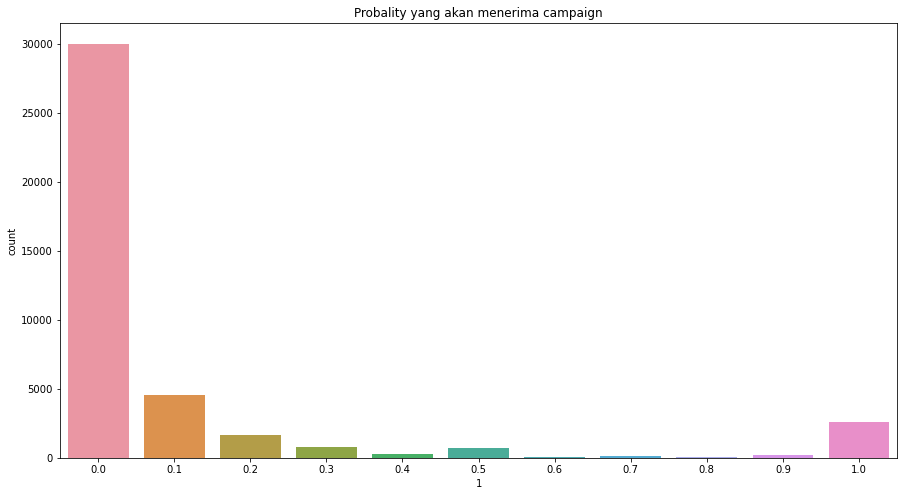

In [130]:
plt.figure(figsize=(15, 8))
sns.countplot(x= tabel_probability[1].round(1) , data=tabel_probability)
plt.title('Probality yang akan menerima campaign')
plt.show()

In [131]:
tabel_probability = tabel_probability.drop(columns=0).round(1)
tabel_probability

,1
0,0.0
1,0.0
2,0.1
3,0.0
4,0.0
...,...
41171,1.0
41172,0.0
41173,0.0
41174,1.0


In [132]:
tabel_probability.value_counts()

1  
0.0    30018
0.1     4556
1.0     2612
0.2     1681
0.3      811
0.5      690
0.4      271
0.9      221
0.7      147
0.6       90
0.8       79
dtype: int64

Based on value counts above. Telemarketing would focus to NOT calling those who have probability on 0.0 - 0.1 and focus on other probability instead